In [1]:
#NATIVE PYTHON IMPORTS
import json

#INSTALLED PACKAGE IMPORTS
from geopy.point import Point
from shapely import Polygon
from shapely import Point as ShapelyPoint

#IMPORTS FROM THIS PACAKGE
from grid_src.grid import Grid

In [2]:
file = "/home/mlitton/Downloads/MAST2.14/CLOX_experiments/experiment_MLL.json"

In [10]:
grid = Grid(file, grid_height=50, grid_width=50, print_stats=True)


The grid is 50 (height) by 50 (width)
Each cell is 24.959602336118895 km tall and 24.959612764003573 km wide
Of the 2500 cells, 465 of them are land and 2035 of them are water.


In [11]:
grid.plot()

(8, 13)


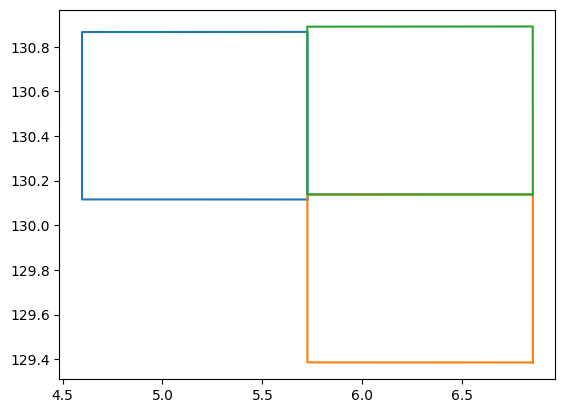

In [5]:
import matplotlib.pyplot as plt
from shapely import MultiPolygon

fig, ax = plt.subplots()
cell1 = grid.grid[-1][-1]
p1 = Polygon(cell1.poly_coords)
cell2 = grid.grid[-2][-2]
print(cell2.coordinate)
p2 = Polygon(cell2.poly_coords)

p3 = Polygon(grid.grid[-2][-1].poly_coords)

polygons = MultiPolygon([p1,p2,p3])

for poly in polygons.geoms:
    x,y = poly.exterior.xy
    ax.plot(x,y)

plt.show()


In [6]:
print(json.dumps(grid.scenario_json,indent=4))

{
    "properties.version": [
        "version = MAST 2.14"
    ],
    "properties.detailedLog": [
        "selectedCheckboxes = Summary at end; Resources transferred; Sensor identification; Agent enters or leaves a wake. Check every: 10 sec; Missile seeker turns on; Jamming ends on an agent; Missile dies/is removed from simulation; Agent death; Agent receives a detection/track/identification from another source; Agent receives an order; Missile seeker acquires a new target; Agent enters or leaves a state; Agent responds to an order; Passive detection; Missile think rate; Agent initialization; Agent enters or leaves a geometry/crosses a geometry line. Check every: 10 sec; Updated detection; Missile seeker detects a target; Agent is hit; Electronic attack used; Kill assessment results returned; Gun burst intercepted target; Scenario ends; Fire on bearing; Waypoint achieved; Agent sends an order; Geometry initialization; Disengage notice; Track dropped on an agent; Agent fires a gun; Mis

In [7]:
for row in grid.grid:
    for cell in row:
        if(cell.of_interest):
            print(cell.coordinate)

(5, 5)
(5, 6)
(6, 4)
(6, 5)
